In [ ]:
pip install -U ydata-profiling


In [ ]:
pip install -U ydata-profiling[notebook,unicode,pyspark]

In [2]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport

In [41]:
df = pd.read_csv("/content/red_wine.csv")


In [ ]:
profile = ProfileReport(df, title="Profiling Report")

In [ ]:
profile.to_file("your_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from numpy import mean
from numpy import absolute
from numpy import sqrt
import pandas as pd


In [ ]:
df

In [42]:
for i in range(0,571):
  if df.iloc[i,3] == 'low':
    df.iloc[i,3] = 0
  else :
    df.iloc[i,3] = 1

X = df[['citric acid', 'sulphates','alcohol']]
y = df['type']

In [43]:
y = y.astype("int")

In [10]:
#Logistic Regression
#Implementing k-fold cross validation  
k = 10  
k_fold = KFold(n_splits = k, random_state = None)  
Lr = LogisticRegression(solver = 'liblinear')  

# Finding accuracy scores using cross_val_score methods  
mean_score_lr = cross_val_score(Lr, X, y, cv = k_fold).mean()  
mean_roc_auc = cross_val_score(Lr, X, y, scoring="roc_auc", cv = k_fold).mean()
  
print("Mean accuracy score: ", mean_score_lr)  
print("Mean ROC_AUC:", mean_roc_auc)

Mean accuracy score:  0.7810949788263762
Mean ROC_AUC: 0.875374463285012


In [11]:
#SVM
from sklearn import svm


#Create a svm Classifier
clf = svm.SVC(kernel='poly') 

#Implementing k-fold cross validation 
k = 10  
k_fold = KFold(n_splits = k, random_state = None)  
 

# Finding accuracy scores using cross_val_score methods  
mean_score_svm = cross_val_score(clf, X, y, cv = k_fold).mean()  
mean_roc_svm = cross_val_score(clf, X, y, scoring="roc_auc", cv = k_fold).mean()
  
print("Mean accuracy score: ", mean_score_svm)  
print("Mean ROC_AUC:", mean_roc_svm)


Mean accuracy score:  0.7619177253478524
Mean ROC_AUC: 0.8562763331234319


In [12]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier() 

#Implementing k-fold cross validation 
k = 10  
k_fold = KFold(n_splits = k, random_state = None)  
 

# Finding accuracy scores using cross_val_score methods  
mean_score_rf = cross_val_score(rf, X, y, cv = k_fold).mean()  
mean_roc_rf = cross_val_score(rf, X, y, scoring="roc_auc", cv = k_fold).mean()
  
print("Mean accuracy score: ", mean_score_rf)  
print("Mean ROC_AUC:", mean_roc_rf)


Mean accuracy score:  0.8371748336358136
Mean ROC_AUC: 0.9234855052641946


In [13]:
#Decision Tree
from sklearn import tree
dt = tree.DecisionTreeClassifier()

#Implementing k-fold cross validation 
k = 10  
k_fold = KFold(n_splits = k, random_state = None)  
 

# Finding accuracy scores using cross_val_score methods  
mean_score_dt = cross_val_score(dt, X, y, cv = k_fold).mean()  
mean_roc_dt = cross_val_score(dt, X, y, scoring="roc_auc", cv = k_fold).mean()
  
print("Mean accuracy score: ", mean_score_dt)  
print("Mean ROC_AUC:", mean_roc_dt)

Mean accuracy score:  0.8108287961282515
Mean ROC_AUC: 0.7976755346340302


In [14]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

nb =  GaussianNB()

#Implementing k-fold cross validation 
k = 10  
k_fold = KFold(n_splits = k, random_state = None)  

# Finding accuracy scores using cross_val_score methods  
mean_score_nb = cross_val_score(nb, X, y, cv = k_fold).mean()  
mean_roc_nb = cross_val_score(nb, X, y, scoring="roc_auc", cv = k_fold).mean()
  
print("Mean accuracy score: ", mean_score_nb)  
print("Mean ROC_AUC:", mean_roc_nb)



Mean accuracy score:  0.8215063520871142
Mean ROC_AUC: 0.8954626514494424


In [15]:
#Zero R classifier
from sklearn.dummy import DummyClassifier
ZeroR = DummyClassifier(strategy="most_frequent")

#Implementing k-fold cross validation 
k = 10  
k_fold = KFold(n_splits = k, random_state = None)  

# Finding accuracy scores using cross_val_score methods  
mean_score_ZeroR= cross_val_score(ZeroR, X, y, cv = k_fold).mean()  
mean_roc_ZeroR = cross_val_score(ZeroR, X, y, scoring="roc_auc", cv = k_fold).mean()
  
print("Mean accuracy score: ", mean_score_ZeroR)  
print("Mean ROC_AUC:", mean_roc_ZeroR)

Mean accuracy score:  0.5287053841500302
Mean ROC_AUC: 0.5


In [ ]:
pip install git+git://github.com/rasbt/mlxtend.
pip install imodels

In [2]:
import math
import numpy as np
from copy import deepcopy
from sklearn.base import BaseEstimator
from sklearn.base import BaseEstimator, ClassifierMixin, RegressorMixin
from sklearn.utils.multiclass import check_classification_targets, unique_labels
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted

from imodels import GreedyRuleListClassifier
from imodels.rule_list.rule_list import RuleList
from imodels.util.arguments import check_fit_arguments


class OneRClassifier(GreedyRuleListClassifier):
    def __init__(self, max_depth=5, class_weight=None, criterion='gini'):
        self.max_depth = max_depth
        self.feature_names_ = None
        self.class_weight = class_weight
        self.criterion = criterion
        self._estimator_type = 'classifier'

    def fit(self, X, y, feature_names=None):
        """Fit oneR
        """
        X, y, feature_names = check_fit_arguments(self, X, y, feature_names)

        ms = []
        accs = np.zeros(X.shape[1])
        for col_idx in range(X.shape[1]):
            x = X[:, col_idx].reshape(-1, 1)
            m = GreedyRuleListClassifier(max_depth=self.max_depth, class_weight=self.class_weight,
                                         criterion=self.criterion)
            feat_names_single = [self.feature_names_[col_idx]]
            m.fit(x, y, feature_names=feat_names_single)
            accs[col_idx] = np.mean(m.predict(x) == y)
            ms.append(m)
            # print('acc', feat_names_single[0], f'{accs[col_idx]:0.2f}')
        col_idx_best = np.argmax(accs)
        self.rules_ = ms[col_idx_best].rules_
        self.complexity_ = len(self.rules_)

        # need to adjust index_col since was fitted with only 1 col
        for rule in self.rules_:
            if 'index_col' in rule:
                rule['index_col'] += col_idx_best
        self.depth = len(self.rules_)
        return self


In [ ]:
#OneR Classifier
from mlxtend.classifier import OneRClassifier
oner = OneRClassifier()

#Implementing k-fold cross validation 
k = 10  
k_fold = KFold(n_splits = k, random_state = None)  

# Finding accuracy scores using cross_val_score methods  
mean_score_oner= cross_val_score(oner, X, y, cv = k_fold).mean()  
mean_roc_oner = cross_val_score(oner, X, y, scoring="roc_auc", cv = k_fold).mean()
  
print("Mean accuracy score: ", mean_score_oner)  
print("Mean ROC_AUC:", mean_roc_oner)

In [16]:
df1 = pd.DataFrame()

In [17]:
df1["Model"] = ["AUC","Accuracy"]
df1["ZeroR"] =["N/A",mean_score_ZeroR]
df1["LR"] = [mean_score_lr,mean_roc_auc]
df1["NB"] = [mean_score_nb,mean_roc_nb]
df1["DT"] = [mean_score_dt,mean_roc_dt]
df1["SVM"] = [mean_score_svm,mean_roc_svm]
df1["RF"] = [mean_score_rf,mean_roc_rf]

In [18]:
df1

,Model,ZeroR,LR,NB,DT,SVM,RF
0,AUC,N/A,0.781095,0.821506,0.810829,0.761918,0.837175
1,Accuracy,0.528705,0.875374,0.895463,0.797676,0.856276,0.923486


In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier() 

mean_fpr = np.linspace(0, 1, 100)
tprs, aucs = [], []
mean_fpr = np.linspace(0, 1, 100)

#Implementing k-fold cross validation 
k = 10  
k_fold = KFold(n_splits = k, random_state = None)  
 
fig, ax = plt.subplots()
for index, (train, test) in enumerate(k_fold.split(X, y)):
	model.fit(X[train], y[train])
	plot = RocCurveDisplay.from_estimator(
		model, X[test], y[test],
		name="ROC fold {}".format(index),
		ax=ax,
	)
	interp_tpr = np.interp(mean_fpr, plot.fpr, plot.tpr)
	interp_tpr[0] = 0.0
	tprs.append(interp_tpr)
	aucs.append(plot.roc_auc)

ax.set(
	xlim=[-0.05, 1.05],
	ylim=[-0.05, 1.05],
	title="Receiver operating characteristic with CV",
)
plt.savefig("roc_cv.jpeg")




<ipython-input-36-efb159d35021>:24: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr, fpr, tpr)
<ipython-input-36-efb159d35021>:24: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr, fpr, tpr)
<ipython-input-36-efb159d35021>:24: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr, fpr, tpr)
<ipython-input-36-efb159d35021>:24: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr, fpr, tpr)
<ipython-input-36-efb159d35021>:24: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr, fpr, tpr)
<ipython-input-36-efb159d35021>:24: DeprecationWarning: scipy.interp is dep

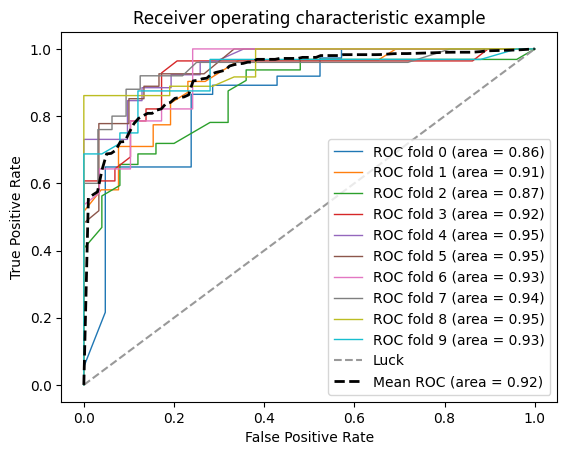

In [36]:
## ROC Of Random Forest

import numpy as np
from scipy import interp
import pylab as pl

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import KFold

k = 10  
cv = KFold(n_splits = k, random_state = None)  
classifier = RandomForestClassifier() 

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

i = 0
for train_index, test_index in cv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:,1 ])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    pl.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
    i += 1

pl.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

mean_tpr /= 10
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
pl.plot(mean_fpr, mean_tpr, 'k--',label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

pl.xlim([-0.05, 1.05])
pl.ylim([-0.05, 1.05])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic example')
pl.legend(loc="lower right")
pl.show()

In [72]:
from sklearn import metrics

# creating a RF classifier
clf = RandomForestClassifier()
clf.fit(X, y)

df2 = pd.read_csv("/content/white_wine.csv")
for i in range(0,len(df2)):
  if df2.iloc[i,3] == 'low':
    df2.iloc[i,3] = 0
  else :
    df2.iloc[i,3] = 1

X_test = df2[['citric acid', 'sulphates','alcohol']]
y_test = df2['type']

y_test = y_test.astype("int")

y_pred = clf.predict(X_test)

print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("AUC",metrics.roc_auc_score(y_test, y_pred))

[[16  1]
 [ 4 57]]
              precision    recall  f1-score   support

           0       0.80      0.94      0.86        17
           1       0.98      0.93      0.96        61

    accuracy                           0.94        78
   macro avg       0.89      0.94      0.91        78
weighted avg       0.94      0.94      0.94        78

Accuracy: 0.9358974358974359
AUC 0.937801350048216
